# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d200/7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Toronto, Ontario, Canada**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(200,'7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef')

# Data Processing

In [2]:
import pandas as pd

# read csv
weather_df = pd.read_csv('data/C2A2_data/BinnedCsvs_d200/7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef.csv')
weather_df.to_csv('Assignment2_raw_CentralOntarioWeather.csv')

# process weather data - drop id, sort by date
weather_df = weather_df.drop(['ID'], axis=1).sort_values(by='Date')#.set_index('Date')
# compute lowest daily tempareture across the region
minTemp_df = weather_df[weather_df['Element']=='TMIN'].drop(['Element'], axis=1)
minTemp_df = minTemp_df.groupby('Date').agg({"Data_Value":[min]})
minTemp_df.columns = ['TMIN']
# compute highest daily tempareture across the region
maxTemp_df = weather_df[weather_df['Element']=='TMAX'].drop(['Element'], axis=1)
maxTemp_df = maxTemp_df.groupby('Date').agg({"Data_Value":[max]})
maxTemp_df.columns = ['TMAX']

# temperature df by date
temperature_df = pd.concat([minTemp_df,maxTemp_df], axis=1, join='inner').reset_index()

#import datetime
# convert string to timestamp
temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])#.dt.date #, format='%d%b%Y:%H:%M:%S.%f')
type(temperature_df['Date'].iloc[0])
temperature_df['Year'] = temperature_df['Date'].dt.strftime('%Y')
temperature_df['MonthDay'] = temperature_df['Date'].dt.strftime('%m-%d')
temperature_df['DayOfYear'] = temperature_df['Date'].dt.strftime('%j').map(int)

# remove leap day: delete month day of 02-29
temperature_df = temperature_df[(temperature_df['MonthDay']!='02-29')]

# save processed data to csv
temperature_df.to_csv('Assignment2_proc_temperature.csv', index=False)

In [3]:
# get final temperature by day dataframe
temperatureByDay_df = temperature_df.groupby('MonthDay').agg({"TMIN":[min], "TMAX":[max],}).reset_index()
temperatureByDay_df.columns = ['MonthDay', 'TMIN', 'TMAX']
temperatureByDay_df['DayOfYear'] = temperatureByDay_df.index + 1

# save processed data to csv
temperatureByDay_df.to_csv('Assignment2_proc_temperatureByDay.csv', index=False)

## Load Processed Data

In [4]:
import pandas as pd

temperatureByDay_df = pd.read_csv('Assignment2_proc_temperatureByDay.csv')
temperatureByDay_df

MonthDay  TMIN  TMAX  DayOfYear
0      01-01   134  -250          1
1      01-02   139  -245          2
2      01-03   161  -270          3
3      01-04   144  -222          4
4      01-05   150  -200          5
5      01-06   160  -260          6
6      01-07   178  -270          7
7      01-08   194  -260          8
8      01-09   183  -236          9
9      01-10   110  -229         10
10     01-11   150  -200         11
11     01-12   161  -250         12
12     01-13   206  -260         13
13     01-14   200  -290         14
14     01-15    89  -290         15
15     01-16   103  -260         16
16     01-17   128  -270         17
17     01-18   128  -275         18
18     01-19   117  -228         19
19     01-20   136  -250         20
20     01-21   139  -320         21
21     01-22   117  -306         22
22     01-23   106  -280         23
23     01-24   106  -295         24
24     01-25   106  -272         25
25     01-26    89  -260         26
26     01-27    83  -311         27
27     01-28   125  -300         28
28     01-29   170  -260         29
29     01-30   189  -255         30
..       ...   ...   ...        ...
335    12-02   140  -135        336
336    12-03   170  -114        337
337    12-04   191  -130        338
338    12-05   194  -159        339
339    12-06   167  -180        340
340    12-07   100  -213        341
341    12-08   120  -214        342
342    12-09   144  -210        343
343    12-10   150  -185        344
344    12-11   156  -175        345
345    12-12   161  -220        346
346    12-13   200  -220        347
347    12-14   222  -206        348
348    12-15   222  -189        349
349    12-16   144  -230        350
350    12-17   150  -245        351
351    12-18   128  -167        352
352    12-19    83  -159        353
353    12-20   100  -230        354
354    12-21   144  -190        355
355    12-22   167  -180        356
356    12-23   183  -170        357
357    12-24   189  -230        358
358    12-25   172  -224        359
359    12-26   122  -194        360
360    12-27   178  -200        361
361    12-28   178  -160        362
362    12-29   172  -180        363
363    12-30   100  -170        364
364    12-31   133  -170        365

[365 rows x 4 columns]

# Plot Functions for time series data

In [6]:
# don't forget the python magic for interactive matplotlib environment

%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt

## Simple line plot

In [10]:
def simpleLinePlot(data, y, X, title='Example Plot', ylabel='y', xlabel='x', lineTyp='-'):
    
    """Construct a simple line plot with provided data, 
    series definition, and labels.
    data: dataframe object
    y: name of the y
    X: names of x series
    ylabel: label of y
    xlabel: label of x
    lineTyp: the line type look
    """
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure()
    
    # plot data
    for x in X:
        plt.plot(data[y], data[x], lineTyp)    

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    
    plt.show()
    

<IPython.core.display.Javascript object>


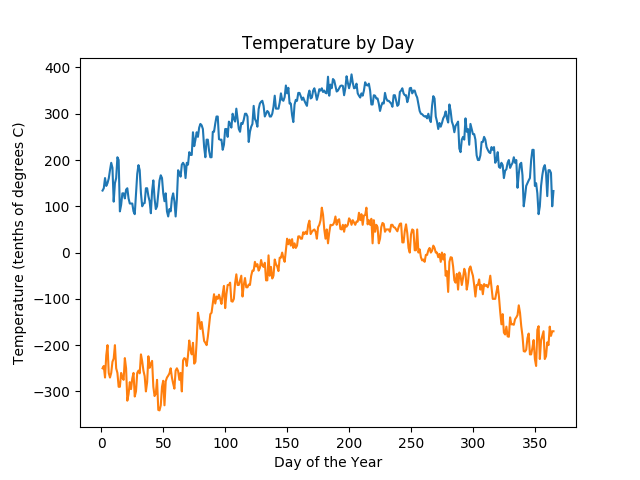

In [11]:
title = 'Temperature by Day'
y = 'DayOfYear'
series = ['TMIN', 'TMAX']
ylabel = 'Temperature (tenths of degrees C)'
xlabel = 'Day of the Year'
simpleLinePlot(temperatureByDay_df,y=y,X=series,title=title,ylabel=ylabel,xlabel=xlabel)

In [13]:
simpleLinePlot?

## Clean line plot
based on minimum chart junk principle

In [ ]:
def cleanLinePlot(data, y, X, title='Example Plot', ylabel='y', xlabel='x', lineTyp='-'):
    
    """Construct a simple line plot with provided data, 
    series definition, and labels.
    data: dataframe object
    y: name of the y
    X: names of x series
    ylabel: label of y
    xlabel: label of x
    lineTyp: the line type look
    """
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure()
    
    # plot data
    for x in X:
        plt.plot(data[y], data[x], lineTyp)    

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    
    plt.show()
    